In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from main import ResNet18,ResNetBlock,Flatten
import matplotlib.pyplot as plt
import numpy as np

In [2]:
batch_size = 16

test_data = torchvision.datasets.CIFAR10(root='./data/',
                                         train=False,
                                         transform=transforms.Compose([
                                             transforms.ToTensor(),
                                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                         ]),
                                         download=False)
test_loader = DataLoader(test_data,
                         batch_size=batch_size,
                         shuffle=True,
                         num_workers=1)

In [3]:
net = torch.load('/home/luo3300612/Workspace/PycharmWS/pytorch_playground/resnet/result/model2000',
                map_location='cpu')

/home/luo3300612/Workspace/PycharmWS/pytorch_playground/venv/lib/python3.6/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'main.ResNetBlock' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [4]:
def sample_data():
    for data,target in test_loader:
        for i in range(batch_size):
            data_i = data[i]
            print(target)
            target_i = target[i]
            print(target_i)
            data_i = torch.squeeze(data_i)
            data_i = np.transpose(data_i,[1,2,0])
            plt.imshow(torch.squeeze(data_i))
            plt.show()
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(8)


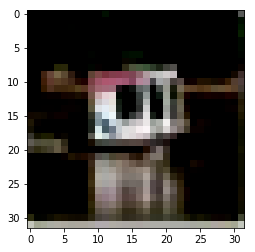

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(7)


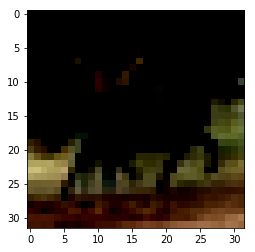

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(9)


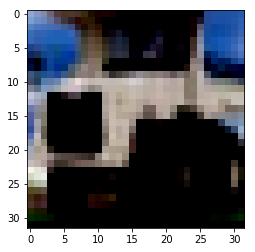

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(3)


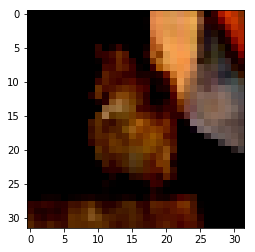

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(9)


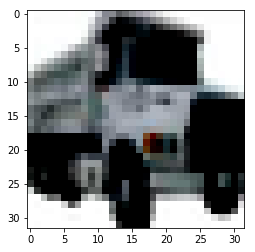

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(3)


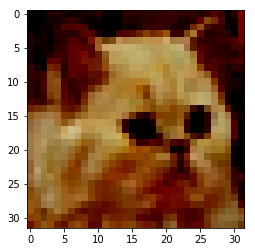

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(8)


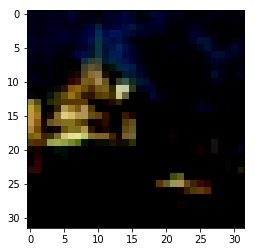

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(0)


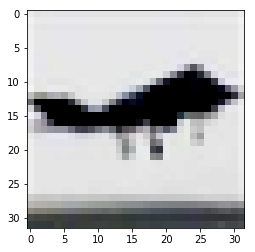

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(6)


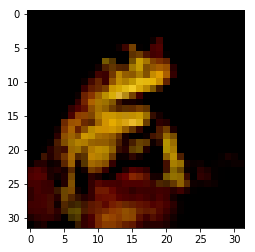

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(0)


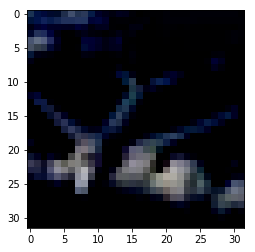

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(5)


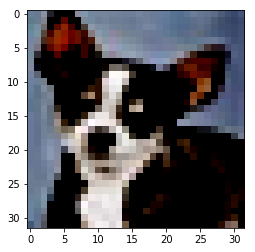

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(3)


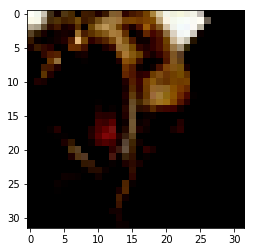

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(6)


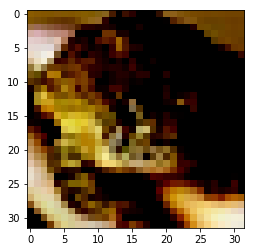

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(4)


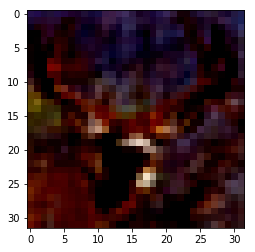

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(8)


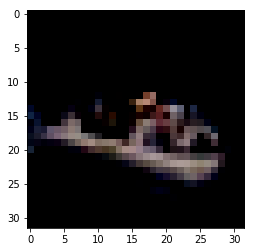

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([8, 7, 9, 3, 9, 3, 8, 0, 6, 0, 5, 3, 6, 4, 8, 5])
tensor(5)


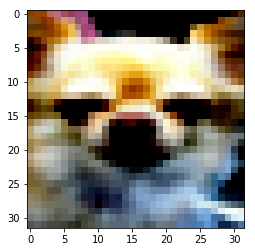

In [5]:
sample_data()

In [6]:
label_map = {
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
}

In [15]:
def evaluation():
    a = 0
    for data,labels in test_loader:
        output = net(data)
        pred_labels =  torch.argmax(output,dim=1)
        
        a += torch.sum(pred_labels==labels).item()
    print(a/len(test_data))

In [16]:
evaluation()

0.7422


In [17]:
1-0.7422

0.25780000000000003